## CP322 Group Project – Machine Learning
Group Members:
- Homer Ayuste (190658320)
- Brady Loenhart (190905340) 
- Vinand Panchal (201526670)

Due Date: Dec 7th, 11:59pm


**Dataset available from:** 
http://archive.ics.uci.edu/ml/datasets/Student+Performance

**Citation**

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
[Web Link]

**NOTE:** within excel we converted the file to have a column for each attribute as opposed to the original dataset which had all feature information in a single cell for ease of use.

## Student Performance Data Set Information


**Abstract:** Predict student performance in secondary education (high school).

**Data Set Characteristics:** Multivariate

**Number of Instances:** 649

**Area:** Social

**Attribute Characteristics:** Integer

**Number of Attributes:** 33

**Date Donated:** 2014-11-27

**Associated Tasks:** Classification, Regression

**Missing Values:** N/A

**Number of Web Hits:** 1270670

**Description:** "This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details)."

**Attribute Information:**

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

Importing necessary libraries from sklearn, numpy, matplotlib

In [702]:
# import the necessary libraries
import numpy as np
from numpy import math

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus


Loading the dataset from the computer, specifically .csv file. Adding the path to the file.

In [703]:
# loading dataset from PC where .csv file is located
data = pd.read_csv("/content/student_mat_converted.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Displaying information about the dataset we are working with

In [704]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Showing the number of rows and columns.

In [705]:
data.shape

(395, 33)

# **Data preprocessing, Visualization of preprocessing, Data Quality Report**

Checking entries for Empty Value:

In [706]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Double check that the dataset had no missing values as the output of code above suggests. Returns the number of missing values in the dataset.

In [707]:
data.isnull().sum().sum()

0

## Identifying and handling outliers

Extreme values that deviate from the majority of other data points in a dataset are known as outliers. They may significantly affect your statistical analysis and distort the outcomes of any hypothesis tests. For accurate findings, it's critical to thoroughly identify potential outliers in your dataset and handle them appropriately.


Outliers predominantly occurr in numerical columns and so we will make a list of all the numerical columns in order to work with them more easily

In [708]:
# Specify numerical columns
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Defining a function that will displau a boxplot for a given dataframe and feature passed in as arguments

In [709]:
# Following code is a function that will display boxplots for given data frame and feature
def plot_box(dataframe, feature):
    sns.set(rc = {'figure.figsize':(10,10)})
    dataframe.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

Calling the boxplot display function for each of the numeric columns. This is essential because boxplots help to visualize the outlier values (if any) that exist for a specified feature

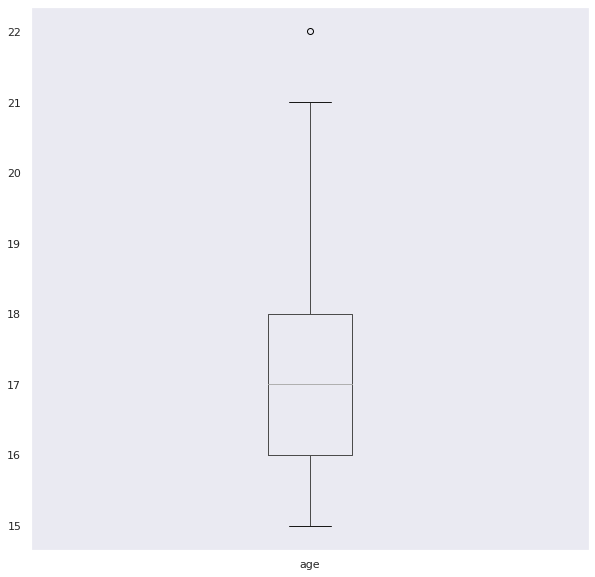

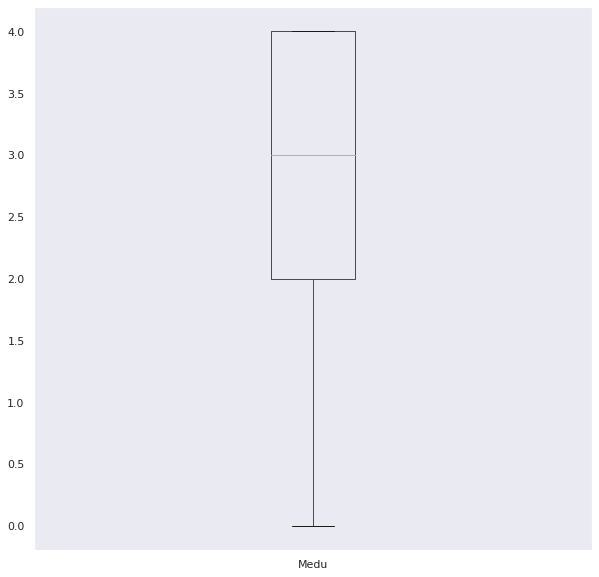

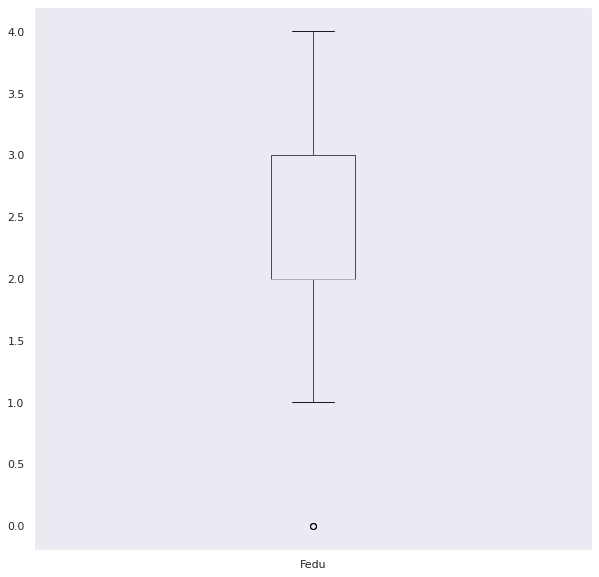

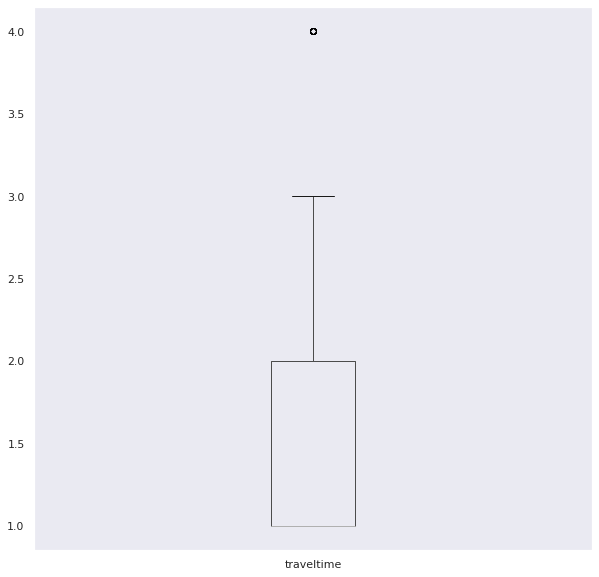

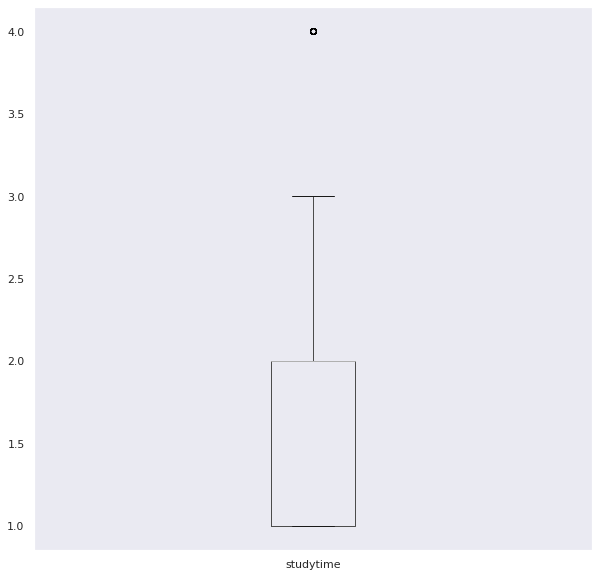

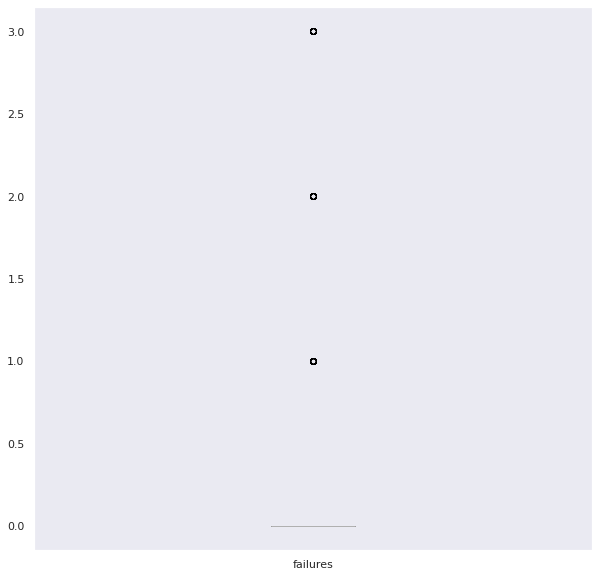

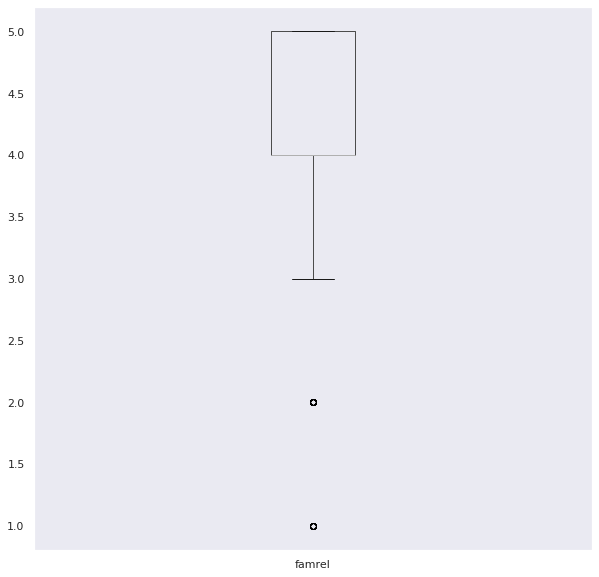

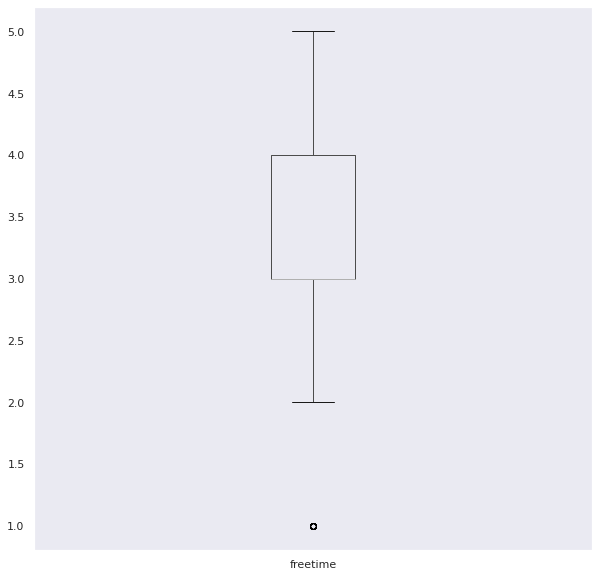

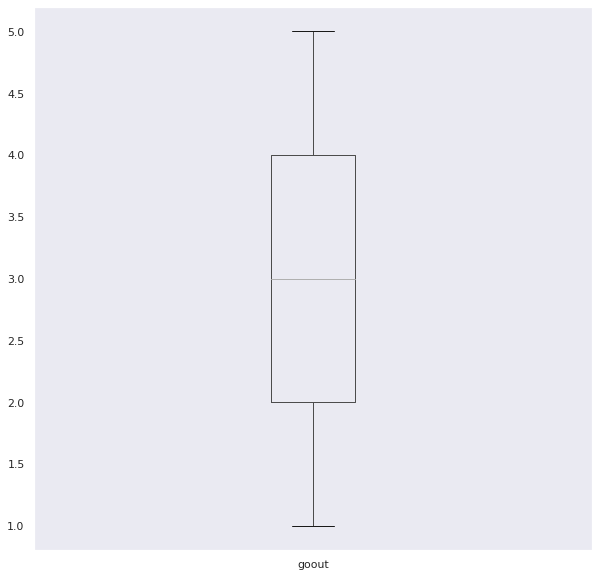

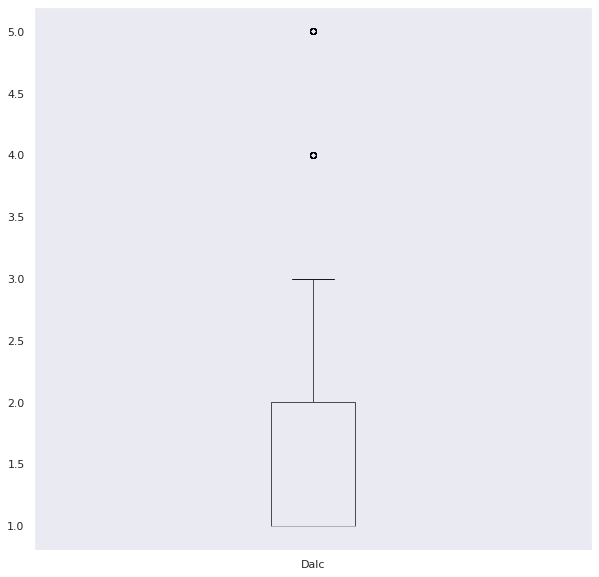

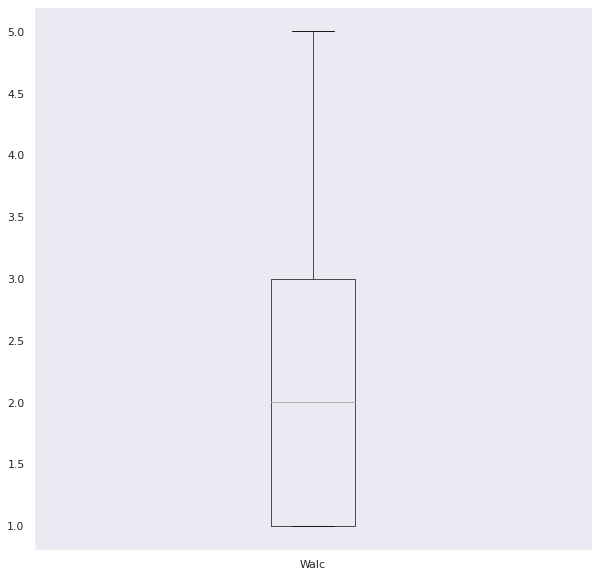

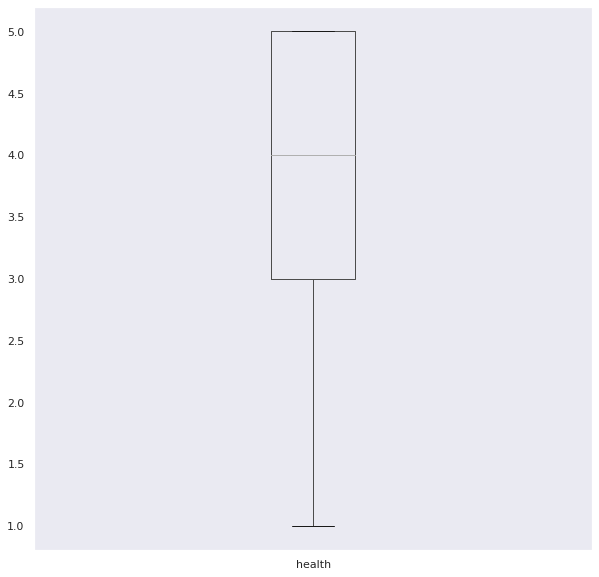

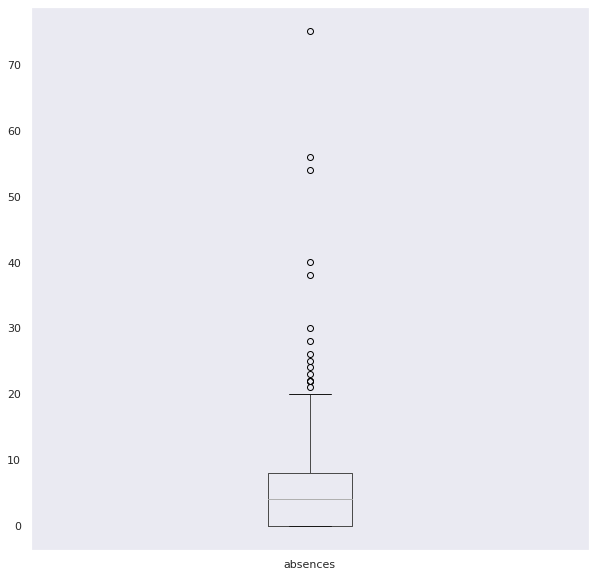

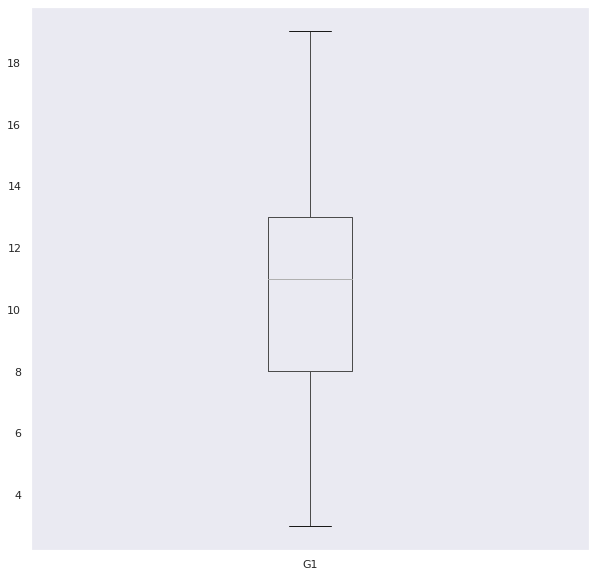

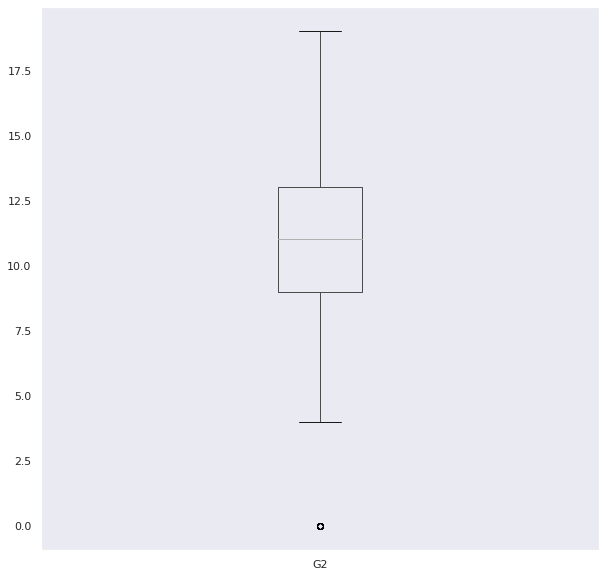

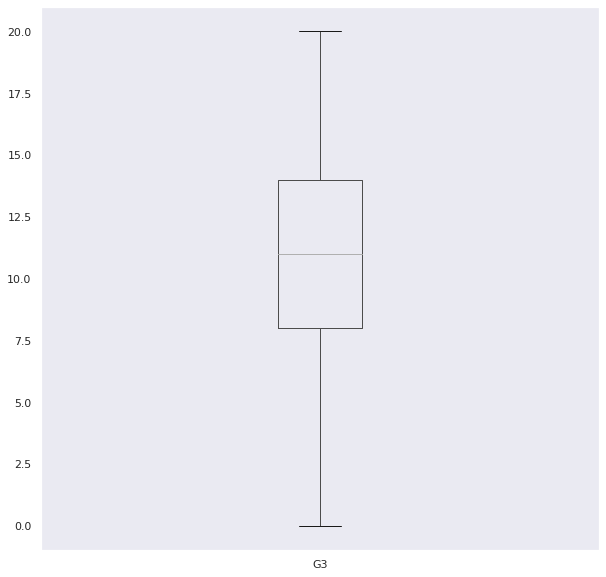

In [710]:
for i in range(0, len(numeric_columns)):
  plot_box(data, numeric_columns[i])

As visualized above there are 10 features that possess at least one outlier and so we will make a list of theses columns contain outlier(s) in order to work with them more easily

In [711]:
has_outliers = ['age', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc', 'absences', 'G2']

## IQR implementation 

The spread of your data's middle quartile is measured by the interquartile range (IQR). It is the range for your sample's middle 50%.


Creating a copy of the dataset which will be the clean data set

In [712]:
data_clean = data.copy(deep=True)

The following function performs capping using the interquartile range (IQR) method. Identifies the outliers using IQR method i.e. Anything that is above Q3 + 1.5 * IQR or below Q1 - 1.5 * IQR is considered an outlier. This function removes the outliers for a column in a dataframe passed as arguments when called.

In [713]:
def i_q_r_cap(dataframe, columns):
    i = 0   
    for col in columns:        
        qr1 = dataframe[col].quantile(0.25)
        qr3 = dataframe[col].quantile(0.75)        
        i_q_r = qr3 - qr1        
        upper_bound = qr3 + (1.5*i_q_r)
        lower_bound = qr1 - (1.5*i_q_r)
        dataframe[col] = np.where(dataframe[col]>upper_bound, upper_bound,
                 np.where(dataframe[col]<lower_bound, lower_bound, dataframe[col]))
        
        plot_box(data_clean, has_outliers[i])
        print(f"""
        Lower threshold for {col}: {lower_bound}
        Upper threshold for {col}: {upper_bound}""")
        i+=1

Calling the IQR function to remove the outliers for the columns in the has_outliers list for the cloned dataset named data_clean

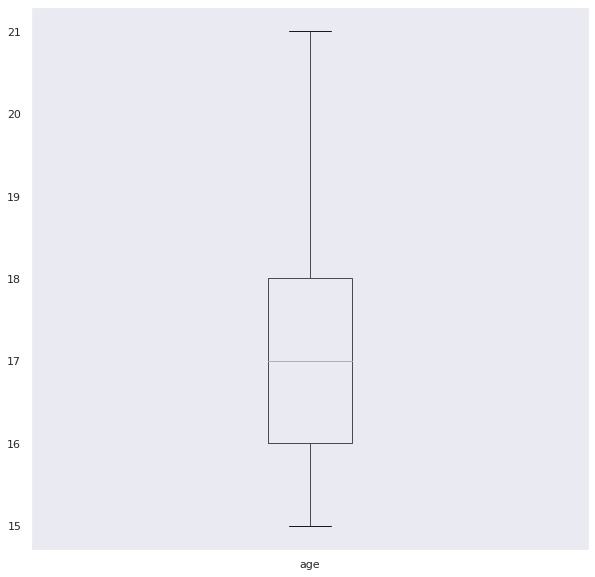


        Lower threshold for age: 13.0
        Upper threshold for age: 21.0


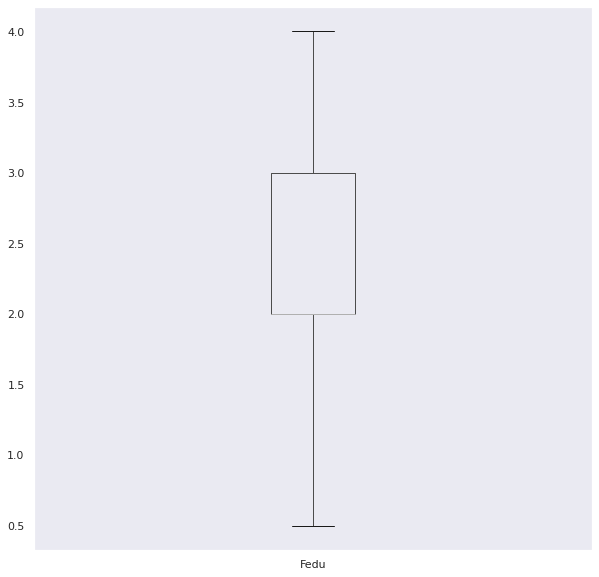


        Lower threshold for Fedu: 0.5
        Upper threshold for Fedu: 4.5


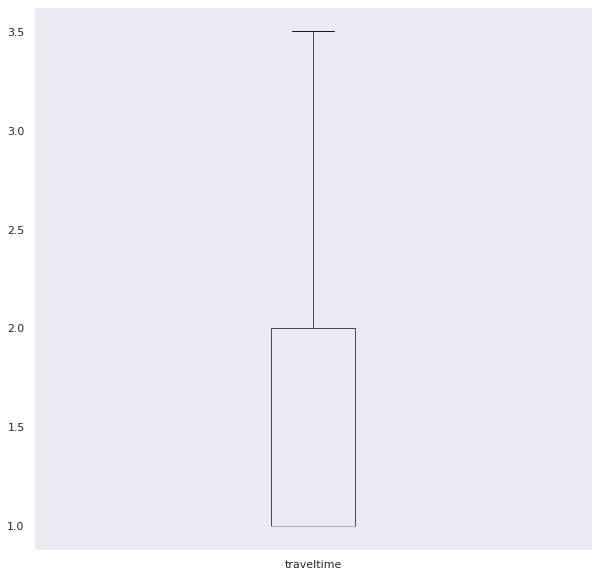


        Lower threshold for traveltime: -0.5
        Upper threshold for traveltime: 3.5


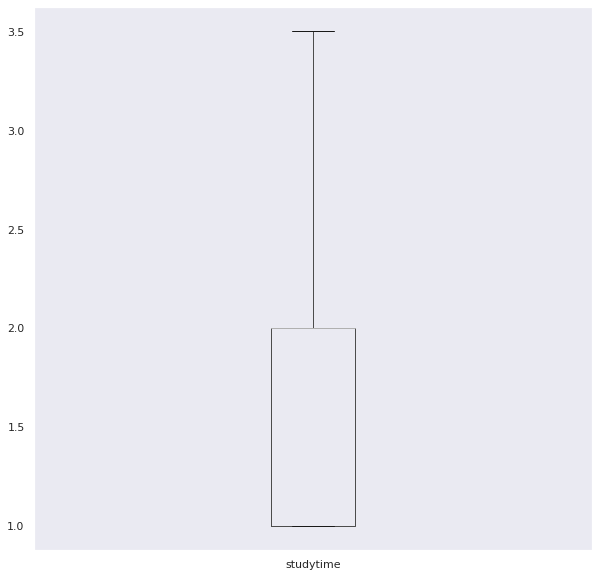


        Lower threshold for studytime: -0.5
        Upper threshold for studytime: 3.5


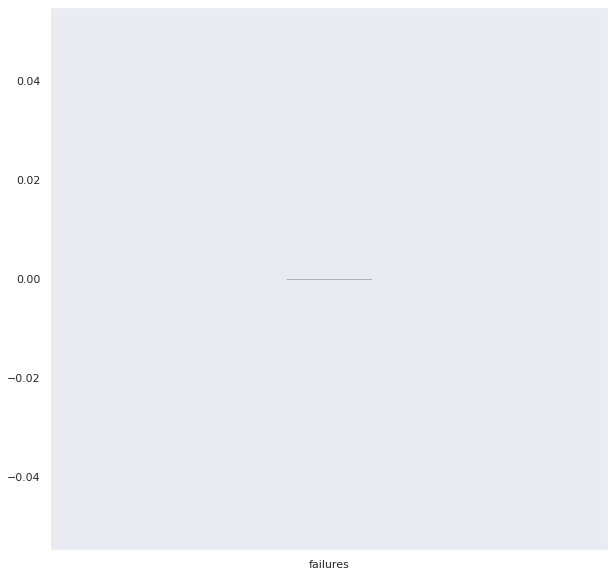


        Lower threshold for failures: 0.0
        Upper threshold for failures: 0.0


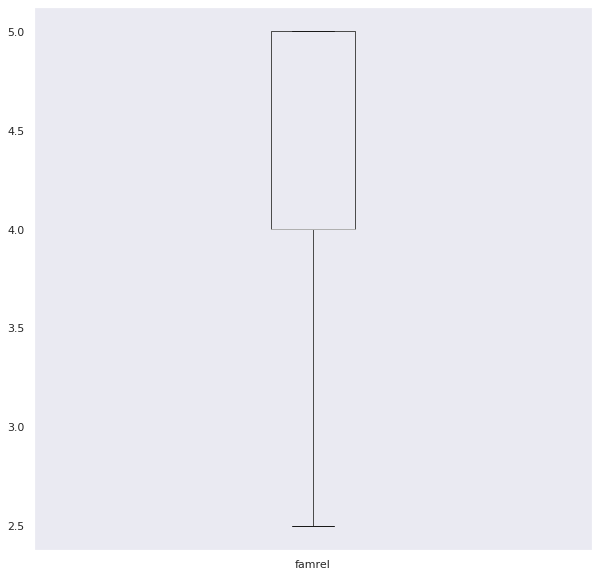


        Lower threshold for famrel: 2.5
        Upper threshold for famrel: 6.5


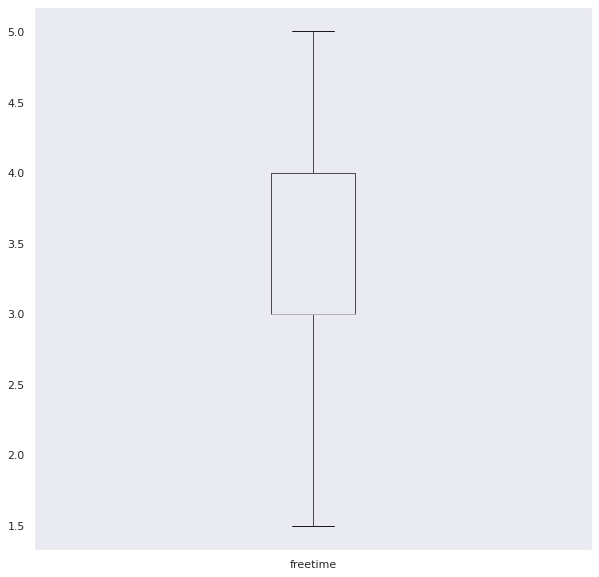


        Lower threshold for freetime: 1.5
        Upper threshold for freetime: 5.5


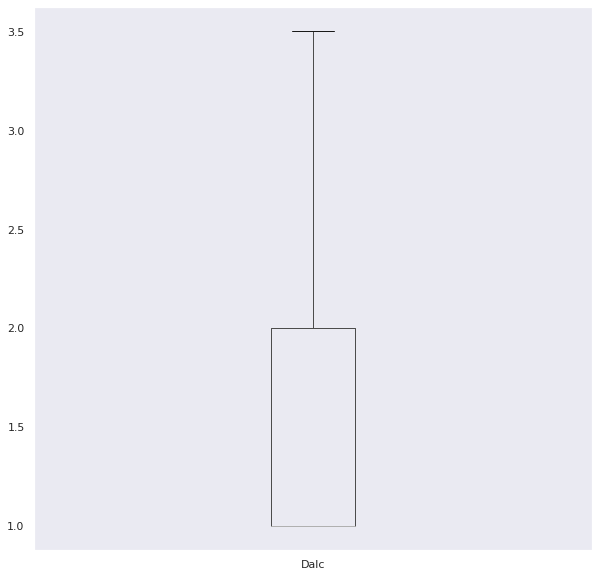


        Lower threshold for Dalc: -0.5
        Upper threshold for Dalc: 3.5


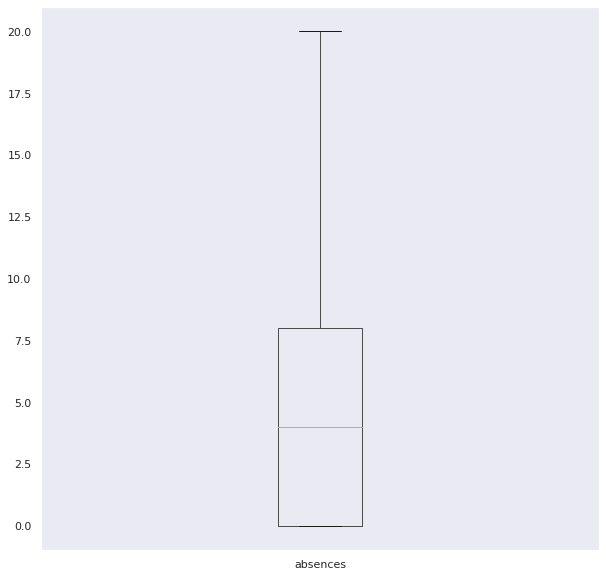


        Lower threshold for absences: -12.0
        Upper threshold for absences: 20.0


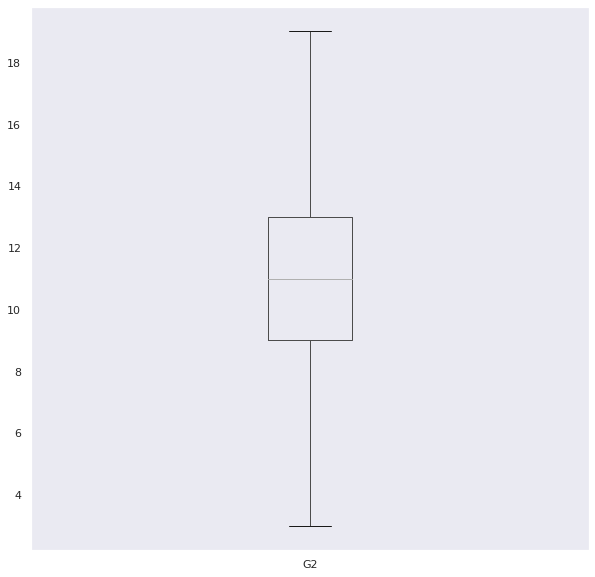


        Lower threshold for G2: 3.0
        Upper threshold for G2: 19.0


In [714]:
i_q_r_cap(data_clean, has_outliers)

# Data Quality Report

The reliability of a given set of data and its suitability for use in decision-making are both determined by data quality. Our data set is now free from missing values as well as outliers and so it is clean.


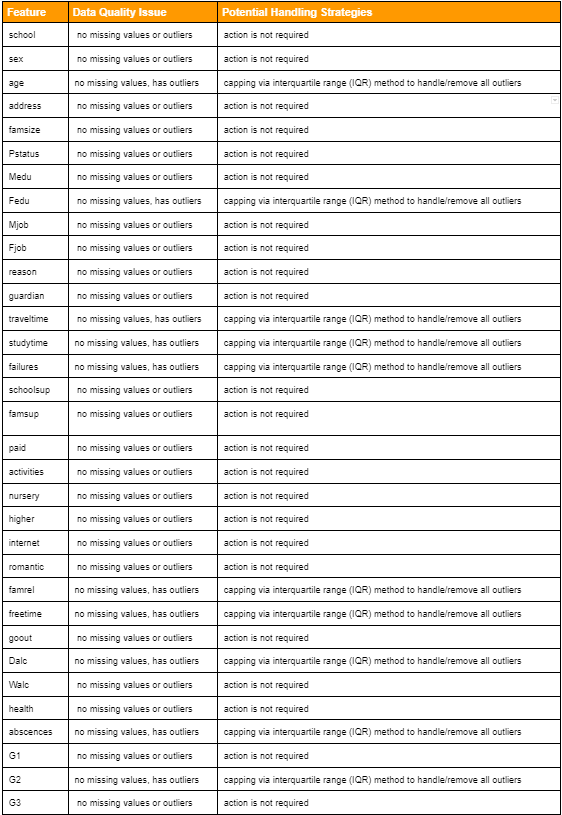

#Implementation of Multiple Linear Regression

Plotting the link between these numerous independent variables and a single dependent variable will enable you to predict the likely outcome based on a number of other variables is a model done by multiple linear regression.

Looking at correlations between between G3 (final grades) and the other features

In [715]:
data_clean.corr()['G3']

age          -0.161747
Medu          0.217147
Fedu          0.154527
traveltime   -0.117659
studytime     0.099024
failures           NaN
famrel        0.058354
freetime      0.008719
goout        -0.132791
Dalc         -0.066432
Walc         -0.051939
health       -0.061335
absences      0.068030
G1            0.801468
G2            0.905780
G3            1.000000
Name: G3, dtype: float64

We are interested in the stronger correlations (absolute value closest to 1)
and so the most important correlations we might consider would be:




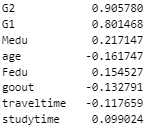

with G2 being the strongest correlation through to studytime being surprisingly the weakest of the features we will say are significant enough to include.

We have now the columns that we want to try for this model.

In [716]:
finalgrades = data_clean['G3']
# dropping/ignoring columns which have a low correlation or we are not interested in for our purposes
data_clean = data_clean.drop(['failures', 'famrel', 'freetime','Dalc', 'Walc', 'health', 'absences', 'G3', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], axis=1)
data_clean['finalgrades'] = finalgrades
data_clean

,age,Medu,Fedu,traveltime,studytime,goout,G1,G2,finalgrades
0,18.0,4,4.0,2.0,2.0,4,5,6.0,6
1,17.0,1,1.0,1.0,2.0,3,5,5.0,6
2,15.0,1,1.0,1.0,2.0,2,7,8.0,10
3,15.0,4,2.0,1.0,3.0,2,15,14.0,15
4,16.0,3,3.0,1.0,2.0,2,6,10.0,10
...,...,...,...,...,...,...,...,...,...
390,20.0,2,2.0,1.0,2.0,4,9,9.0,9
391,17.0,3,1.0,2.0,1.0,5,14,16.0,16
392,21.0,1,1.0,1.0,1.0,3,10,8.0,7
393,18.0,3,2.0,3.0,1.0,1,11,12.0,10


The positive correlation between first period grades (G1) and final grades (G3) can be illustrated in a scatterplot as follows:

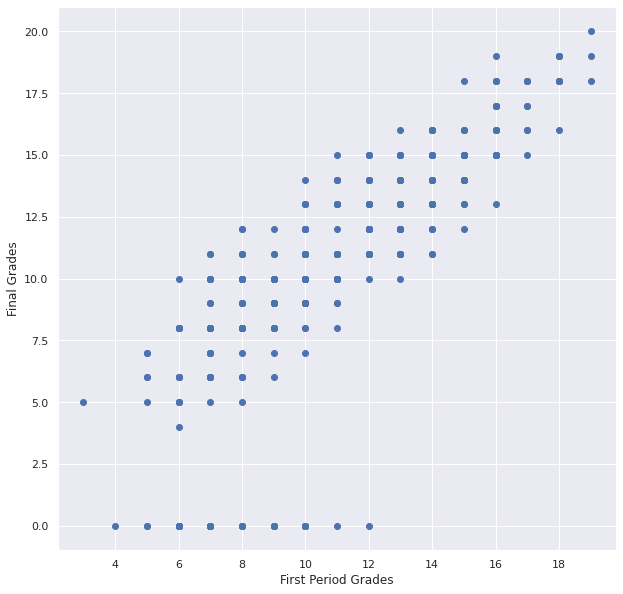

In [717]:
plt.scatter(data_clean['G1'], data_clean['finalgrades'])
plt.xlabel('First Period Grades')
plt.ylabel('Final Grades')
plt.show()

The positive correlation between second period grades (G2) and final grades (G3) can be illustrated in a scatterplot as follows:

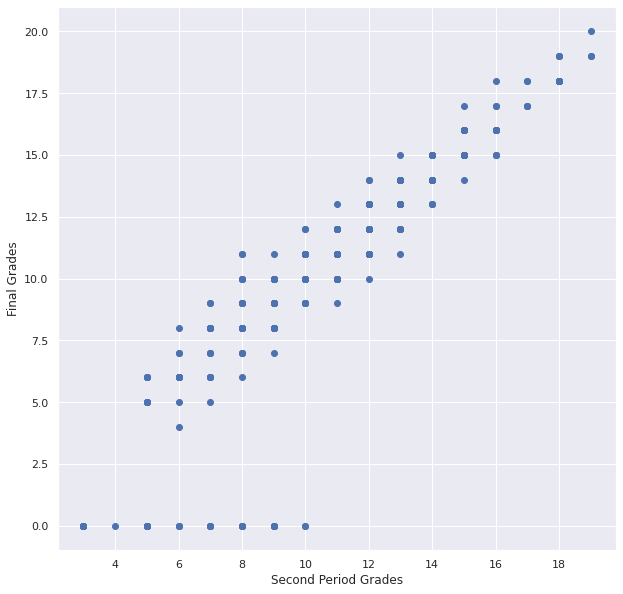

In [718]:
plt.scatter(data_clean['G2'], data_clean['finalgrades'])
plt.xlabel('Second Period Grades')
plt.ylabel('Final Grades')
plt.show()

Showing the relationship between "medu" and "final grades" by plotting scatterplots.

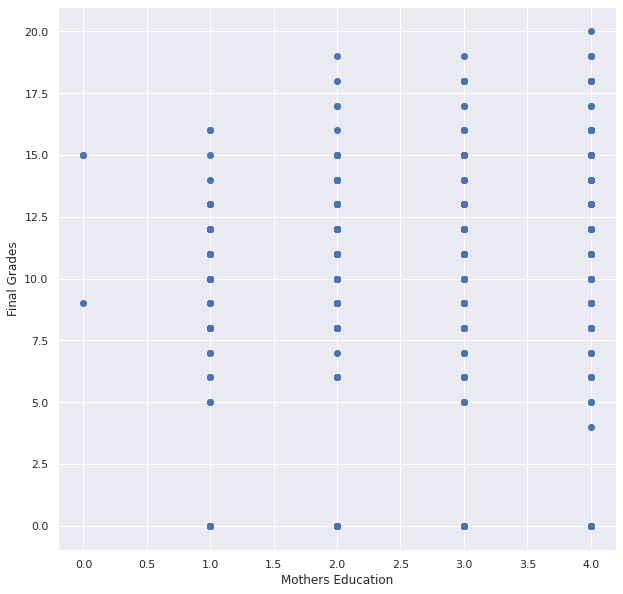

In [719]:
plt.scatter(data_clean['Medu'], data_clean['finalgrades'])
plt.xlabel('Mothers Education')
plt.ylabel('Final Grades')
plt.show()

Showing the relationship between "age" and "final grades" by plotting scatterplots.

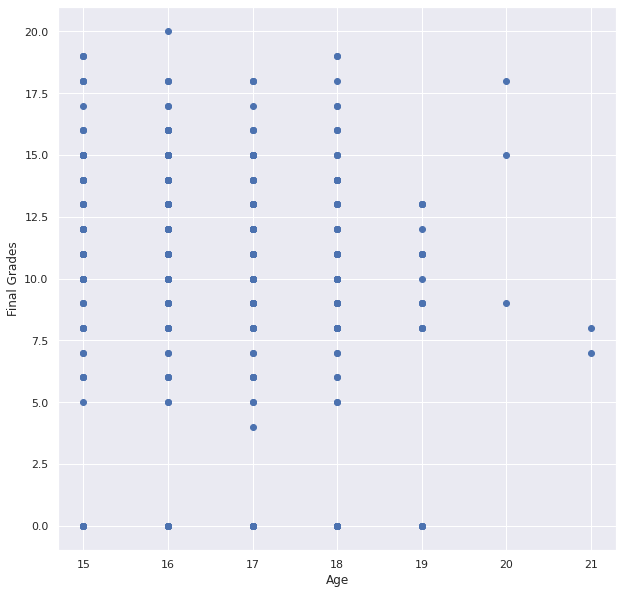

In [720]:
plt.scatter(data_clean['age'], data_clean['finalgrades'])
plt.xlabel('Age')
plt.ylabel('Final Grades')
plt.show()

Showing the relationship between "fedu" and "final grades" by plotting scatterplots.

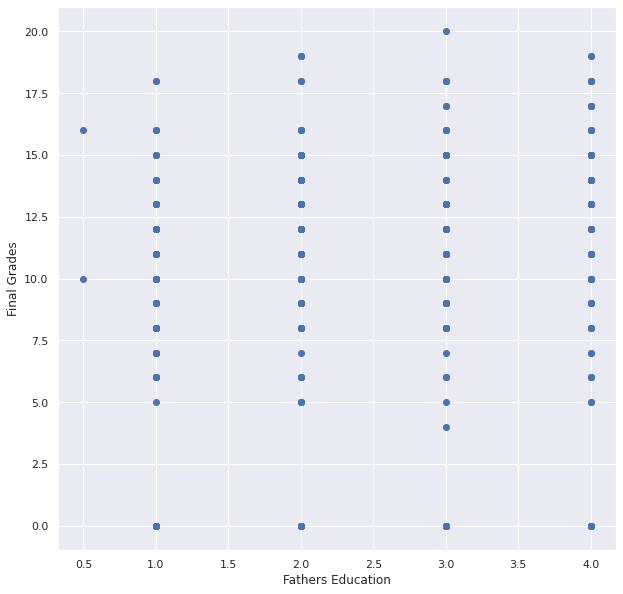

In [721]:
plt.scatter(data_clean['Fedu'], data_clean['finalgrades'])
plt.xlabel('Fathers Education')
plt.ylabel('Final Grades')
plt.show()

Showing the relationship between "goout" and "final grades" by plotting scatterplots.

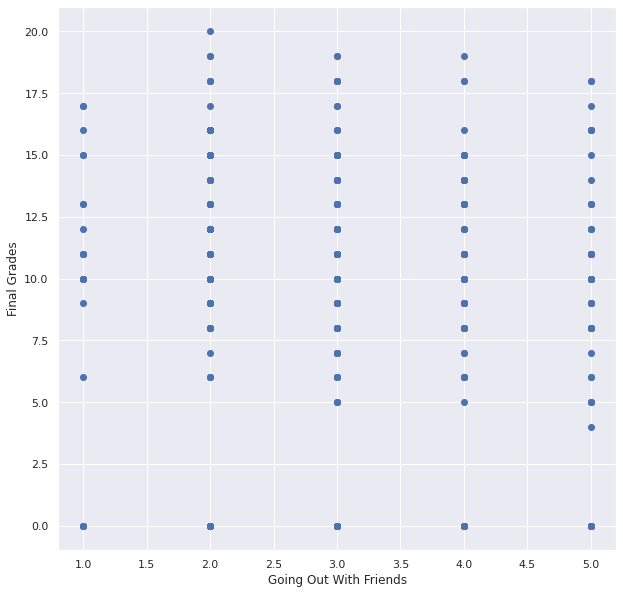

In [722]:
plt.scatter(data_clean['goout'], data_clean['finalgrades'])
plt.xlabel('Going Out With Friends')
plt.ylabel('Final Grades')
plt.show()

Showing the relationship between "traveltime" and "final grades" by plotting scatterplots.

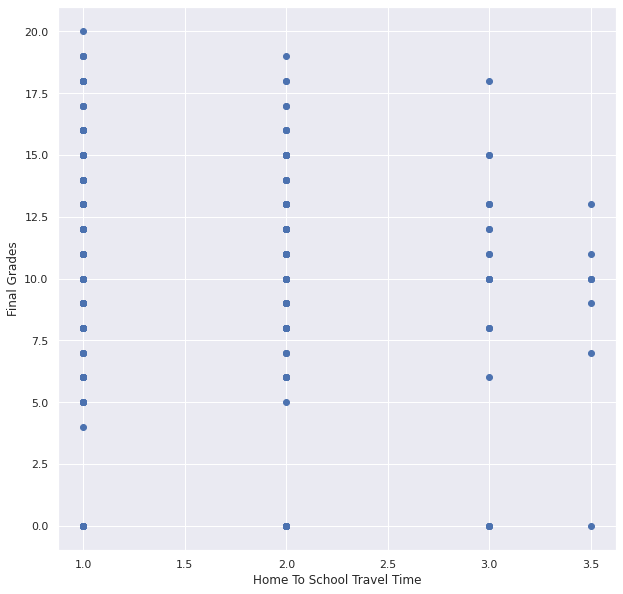

In [723]:
plt.scatter(data_clean['traveltime'], data_clean['finalgrades'])
plt.xlabel('Home To School Travel Time')
plt.ylabel('Final Grades')
plt.show()

Showing the relationship between "studytime" and "final grades" by plotting scatterplots.

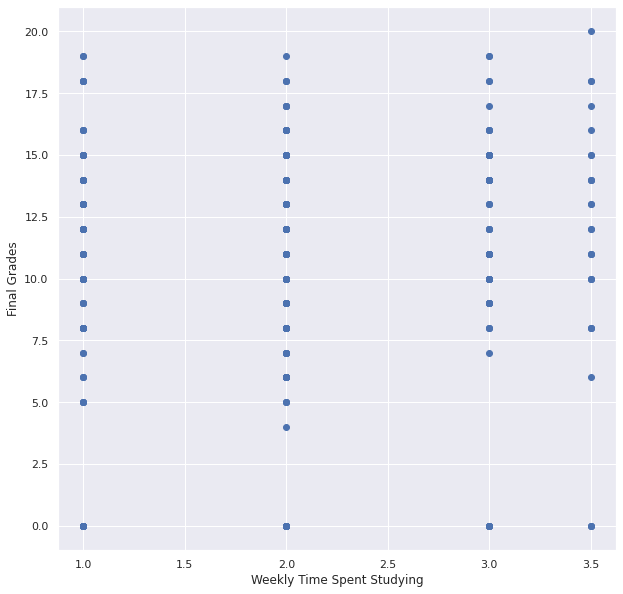

In [724]:
plt.scatter(data_clean['studytime'], data_clean['finalgrades'])
plt.xlabel('Weekly Time Spent Studying')
plt.ylabel('Final Grades')
plt.show()

As we knew, the second and first period grades are the strongest correlation and so we hope to leverage that along with the weaker correlations to more accurately predict final grades

Implementing linear regression algorithm to predict final grades.

The dependent variable is final grades

In [725]:
dependent_variable = 'finalgrades'

Our first linear regression model will include these 8 columns to predict target final grades

In [726]:
independent_variables = ['G2','G1','Medu','age','Fedu', 'goout', 'traveltime', 'studytime']

Ensuring our list of independent variables are correct

In [727]:
independent_variables

['G2', 'G1', 'Medu', 'age', 'Fedu', 'goout', 'traveltime', 'studytime']

Setting x and y to the respective sets of values

In [728]:
x = data_clean[independent_variables].values
y = data_clean[dependent_variable].values

Splitting the data into test and training sets with test size being 30% of the data

In [729]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

Standardize features by removing the mean and scaling to unit variance

In [730]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Model Selection**

Use scikit learn regression model

In [731]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Predict y values from test set of x values using the linear regression model

In [732]:
y_pred = regressor.predict(x_test)

Looking at our predicted y values

In [733]:
y_pred

array([11.73297709, 11.95455939, 18.56671856, 16.7780175 ,  6.08938013,
        8.21192801,  9.71554883, 12.93449514, 14.22269388, 15.61166286,
       18.96632651,  6.07079149, 15.26130387,  1.18639668, 10.51328254,
       12.79323111, 10.32453022, 18.41763966, 11.56443947,  9.07703223,
       13.15764689,  2.12764268,  2.96101854, 18.61945458,  8.27419321,
       10.70793503,  5.67601314, 19.25567437,  8.93161308, 13.49700337,
        7.28532579, 14.12347279, 14.29357414,  5.3475348 , 19.18630846,
        6.93109083,  8.38950678,  7.6633391 ,  7.25107633,  4.61744175,
        4.64732082,  6.03952875, 15.67950047,  5.14800331, 12.92701441,
        9.32206814, 12.18046124,  8.01390736,  6.37430506,  7.79438526,
        8.55548526,  9.19330541,  5.18623159, 12.67286224, 15.07963535,
        7.43110625, 18.64506615, 13.37502772,  6.88664371, 14.96715417,
        6.4959763 ,  9.4321046 ,  9.54685688, 15.43735885, 10.38886654,
       10.32507607, 15.43436925, 15.87194871,  3.69278433, 14.42

# **Model performance and results**

In [734]:
MAE =  metrics.mean_absolute_error(y_test,y_pred )
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE=', MAE)
print('MSE=', MSE)
print('RMSE:', RMSE)

MAE= 1.1521119899343129
MSE= 2.712909102960211
RMSE: 1.6470911034184512


# **Further Model Selection**

Our second linear regression model will be more specific, focused and less broad. It will include these 4 columns to predict target final grades

In [735]:
independent_variables = ['G2','G1','Medu','Fedu']

Specifying 4 columns as independent variables

In [736]:
independent_variables

['G2', 'G1', 'Medu', 'Fedu']

Setting x and y to the respective sets of values

In [737]:
x = data_clean[independent_variables].values
y = data_clean[dependent_variable].values

Splitting the data into test and training sets with test size being 30% of the data

In [738]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

Standardize features by removing the mean and scaling to unit variance

In [739]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Use scikit learn regression model

In [740]:
regressor.fit(x_train, y_train)

LinearRegression()

In [741]:
y_pred = regressor.predict(x_test)

Predict y values from test set of x values using the linear regression model

In [742]:
y_pred

array([11.60696758, 11.6415332 , 18.89738666, 16.49430623,  5.92223676,
        8.22758633,  9.28782379, 13.01232611, 14.02319255, 15.39674431,
       18.89462782,  5.6928591 , 15.2102088 ,  0.83035004, 10.40956563,
       12.89382386, 10.42546902, 17.7970659 , 11.7524086 ,  9.22806707,
       12.93114832,  2.13797771,  3.29529636, 18.99722669,  8.14916738,
       10.60437767,  5.71428018, 19.01313007,  9.42563795, 14.30745892,
        7.20909303, 14.31784462, 14.08570812,  5.75160463, 18.80241465,
        7.12515639,  8.32255834,  8.09042185,  6.93034435,  4.63813932,
        4.498216  ,  5.7329424 , 15.43682761,  4.55420268, 12.99918157,
        9.34105164, 11.75516744,  8.04105082,  6.94900658,  8.13326399,
        8.23586286,  9.30096834,  5.81687904, 13.0178438 , 15.29690429,
        7.10925301, 18.93195228, 13.0990216 ,  7.00389529, 15.402262  ,
        7.11687986,  9.22806707,  9.39318151, 15.2913866 , 10.70697654,
       10.49350227, 15.402262  , 15.50486087,  3.4193163 , 14.09

# Rounding Predicting values
Rounding each predicted floating point to nearest integer, converting to integer, to make predicted final grade data type the same as actual final grades. This is done to see if it will make our model predict more accurately as well as because it is more appropriate to compare int-int as opposed to float-int

In [743]:
y_pred = (np.rint(y_pred)).astype(int)

In [744]:
y_pred

array([12, 12, 19, 16,  6,  8,  9, 13, 14, 15, 19,  6, 15,  1, 10, 13, 10,
       18, 12,  9, 13,  2,  3, 19,  8, 11,  6, 19,  9, 14,  7, 14, 14,  6,
       19,  7,  8,  8,  7,  5,  4,  6, 15,  5, 13,  9, 12,  8,  7,  8,  8,
        9,  6, 13, 15,  7, 19, 13,  7, 15,  7,  9,  9, 15, 11, 10, 15, 16,
        3, 14,  5,  9, 10,  8,  6,  9, 11, 15, 10,  7,  8, 12, 15,  7, 12,
        7, 17, 14, 12,  8,  6,  9,  9, 13,  8, 15, 15, 14,  6, 15, 15, 12,
       14, 14, 17, 12,  8,  8, 15,  8, 11,  3,  7, 14,  9,  7, 12, 16, 17])

# **Final Model performance and results after rounding**

In [745]:
MAE2 =  metrics.mean_absolute_error(y_test,y_pred )
MSE2 = metrics.mean_squared_error(y_test,y_pred)
RMSE2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE=', MAE2)
print('MSE=', MSE2)
print('RMSE:', RMSE2)

MAE= 1.1008403361344539
MSE= 2.7142857142857144
RMSE: 1.647508942095828


Our second, more focused, and rounded linear regression model is more accurate and has a lower, mean absolute error, mean squared error and root mean square error. Therefore this will be the model we will use!

In [746]:
predictions_dataframe = pd.DataFrame({
                                      'Predicted Final Grade': y_pred,
                                      'Actual Final Grade': y_test
})
predictions_dataframe

,Predicted Final Grade,Actual Final Grade
0,12,11
1,12,11
2,19,19
3,16,15
4,6,7
...,...,...
114,9,11
115,7,8
116,12,12
117,16,17


Creating dataframe of performance metrics to help with visualization

In [747]:
mae_performance = [MAE, MAE2]
mse_performance = [MSE, MSE2]
rmse_performance = [RMSE, RMSE2]

model_performance_dataframe = pd.DataFrame({
                                          'Mean Absolute Error': mae_performance,
                                           'Mean Squared Error': mse_performance,
                                           'Root Mean Squared Error': rmse_performance
})

Visualizing in table format, the first row is model 1 which performs worse than model 2

In [748]:
model_performance_dataframe

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,1.152112,2.712909,1.647091
1,1.100840,2.714286,1.647509


In [749]:
model_performance_dataframe.values

array([[1.15211199, 2.7129091 , 1.6470911 ],
       [1.10084034, 2.71428571, 1.64750894]])

Looking at performance of model 1 visually

Text(0.5, 1.0, 'Model 1 Performance')

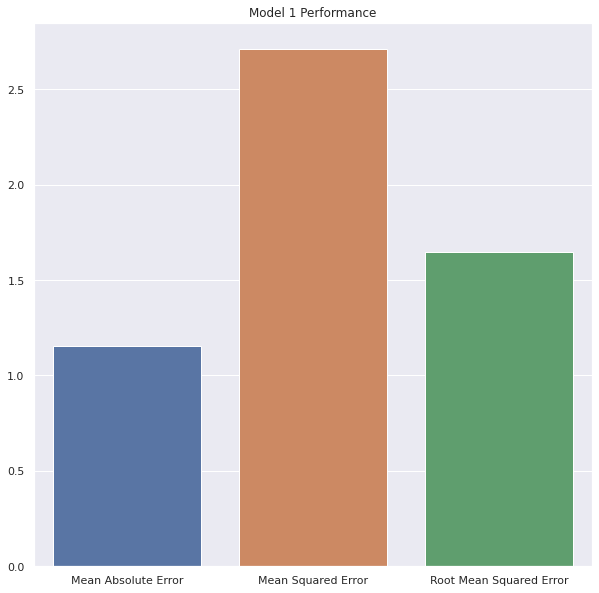

In [750]:
error_types = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
error_values = [model_performance_dataframe.values[0][0], model_performance_dataframe.values[0][1], model_performance_dataframe.values[0][2]]
ax = sns.barplot(x=error_types, y=error_values)
sns.set(rc = {'figure.figsize':(20,20)})
ax.set_title("Model 1 Performance")

Looking at performance of model 2 visually

Text(0.5, 1.0, 'Model 2 Performance')

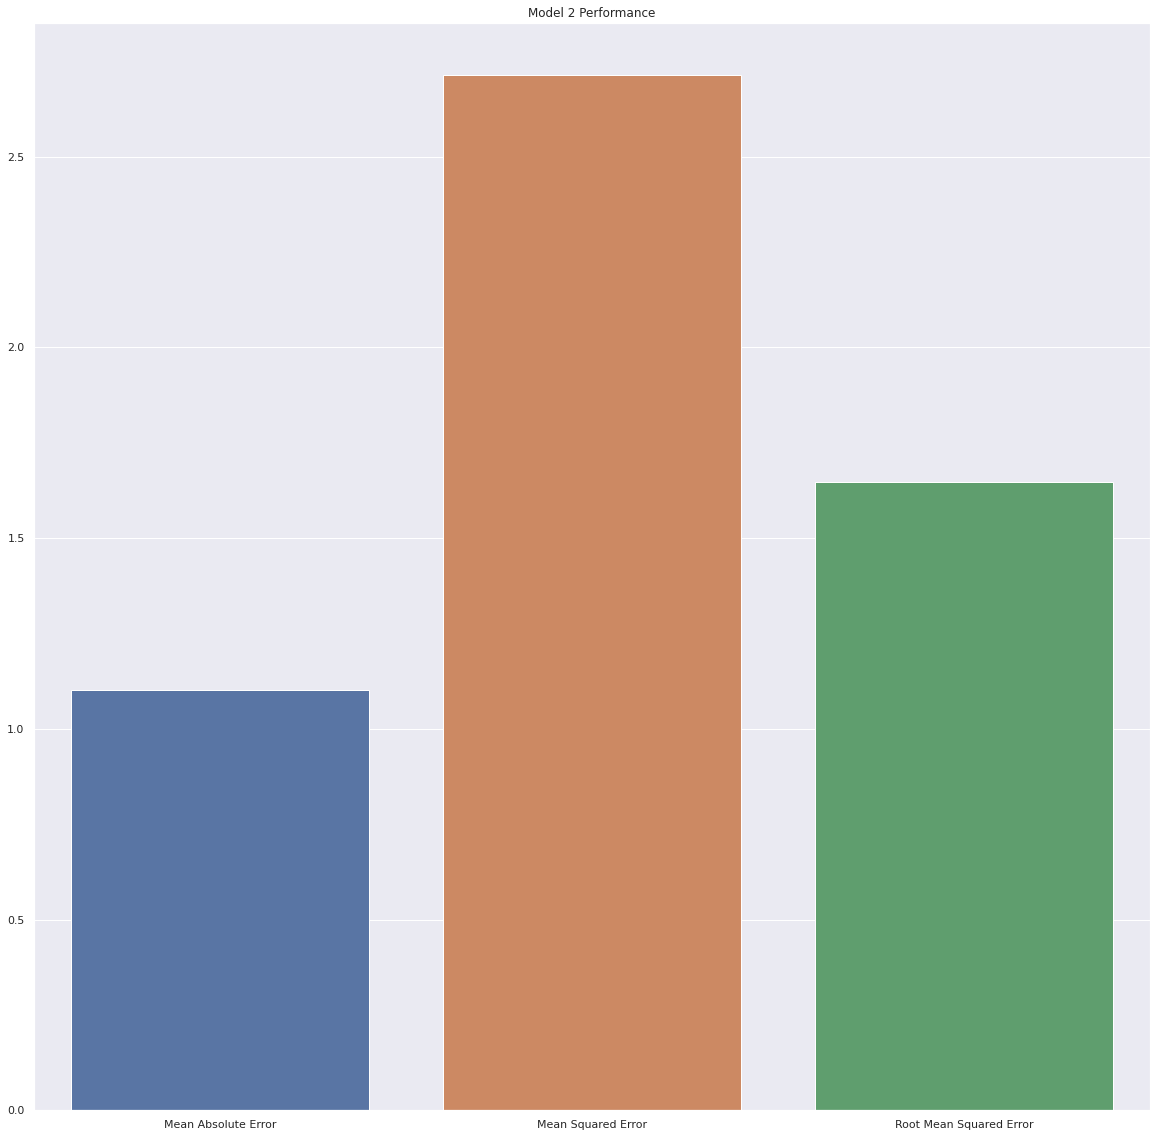

In [751]:
error_types = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
error_values = [model_performance_dataframe.values[1][0], model_performance_dataframe.values[1][1], model_performance_dataframe.values[1][2]]
ax = sns.barplot(x=error_types, y=error_values)
sns.set(rc = {'figure.figsize':(20,20)})
ax.set_title("Model 2 Performance")

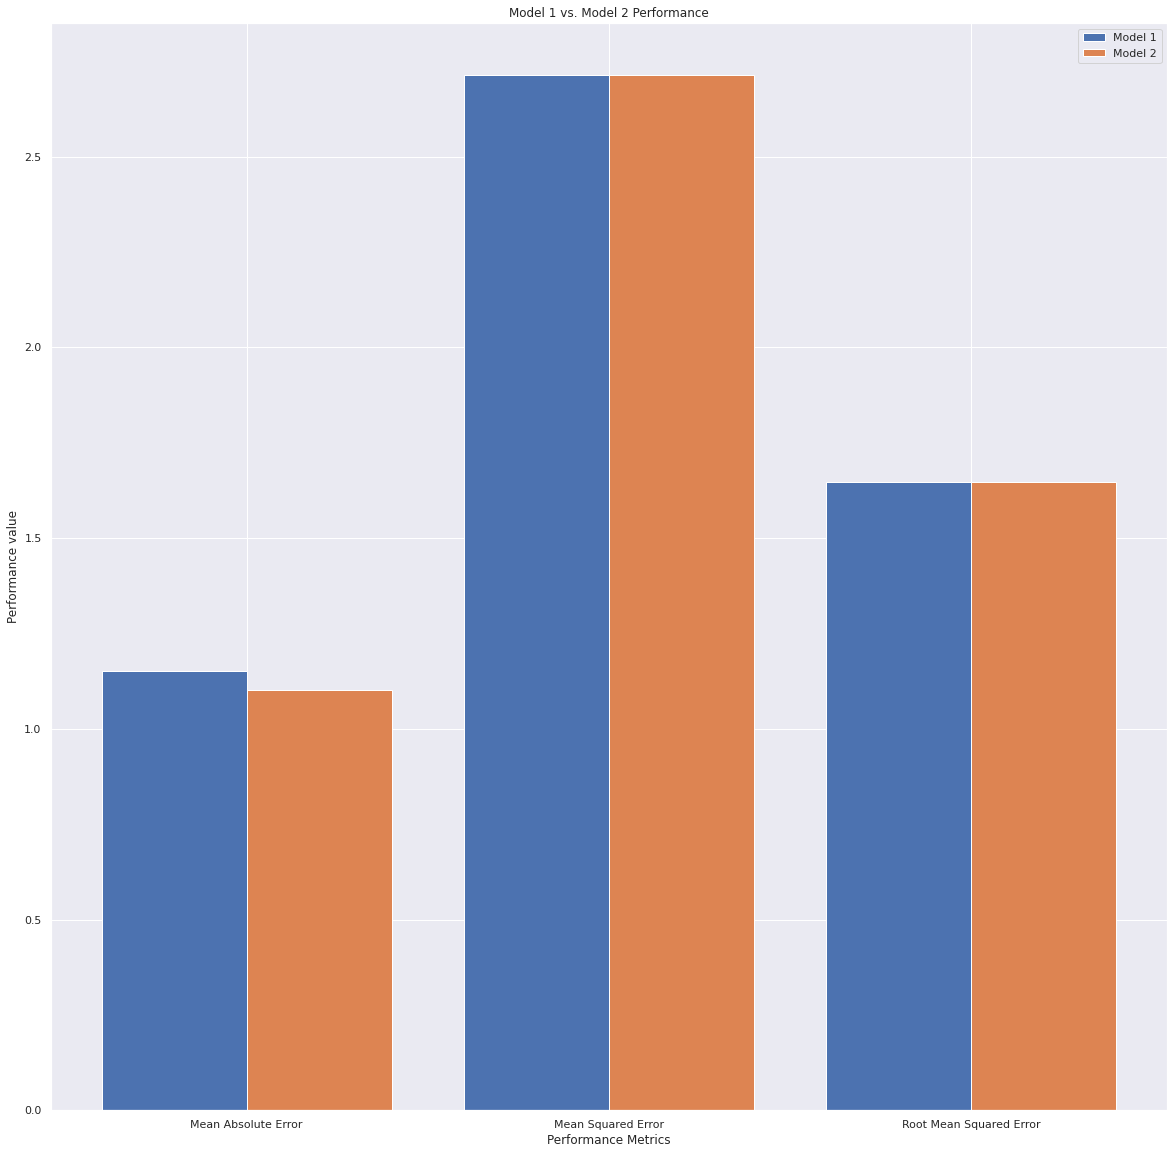

In [752]:
X = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error']
Ymodel1 = [1.15211199, 2.7129091 , 1.6470911]
Zmodel2 = [1.10084034, 2.71428571, 1.64750894]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Ymodel1, 0.4, label = 'Model 1')
plt.bar(X_axis + 0.2, Zmodel2, 0.4, label = 'Model 2')

plt.xticks(X_axis, X)
plt.xlabel("Performance Metrics")
plt.ylabel("Performance value")
plt.title("Model 1 vs. Model 2 Performance")
plt.legend()
plt.show()

# Classification model
We can compare our linear regression model to a classification model. First, we will have to create a new column where we transform the final grades to a classification based on the Portuguese grading system shown below.


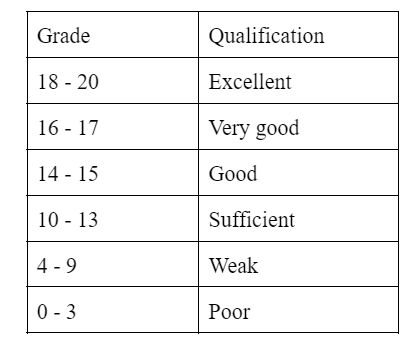

In [753]:
# create a list of our conditions based on the Portuguese grading system
conditions = [
    (data_clean['finalgrades'] <= 3),
    (data_clean['finalgrades'] > 3) & (data_clean['finalgrades'] <= 9),
    (data_clean['finalgrades'] > 9) & (data_clean['finalgrades'] <= 13),
    (data_clean['finalgrades'] > 13) & (data_clean['finalgrades'] <= 15),
    (data_clean['finalgrades'] > 15) & (data_clean['finalgrades'] <= 17),
    (data_clean['finalgrades'] > 17) & (data_clean['finalgrades'] <= 20)
    ]

# create a list of the values we want to assign for each condition
values = ['Poor', 'Weak', 'Sufficient', 'Good',"Very good","Excellent"]
 
# create a new column and use np.select to assign values to it using our lists as arguments
data_clean['finalgrades_qual'] = np.select(conditions, values)

#Display the count of each class
data_clean['finalgrades_qual'].value_counts()[values]



Poor           38
Weak           92
Sufficient    165
Good           60
Very good      22
Excellent      18
Name: finalgrades_qual, dtype: int64

Display the updated Dataframe

In [754]:
# display updated DataFrame
data_clean.head()

,age,Medu,Fedu,traveltime,studytime,goout,G1,G2,finalgrades,finalgrades_qual
0,18.0,4,4.0,2.0,2.0,4,5,6.0,6,Weak
1,17.0,1,1.0,1.0,2.0,3,5,5.0,6,Weak
2,15.0,1,1.0,1.0,2.0,2,7,8.0,10,Sufficient
3,15.0,4,2.0,1.0,3.0,2,15,14.0,15,Good
4,16.0,3,3.0,1.0,2.0,2,6,10.0,10,Sufficient


Now we can use a decision tree do our classification. We start with splitting our data to training and testing sets. 


In [755]:
independent_variables = ['G2','G1','Medu','age','Fedu', 'goout', 'traveltime', 'studytime']
x = data_clean[independent_variables].values
y = data_clean['finalgrades_qual'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)


Then, we can train the model using the decision tree classifier. We found that the most optimal decision tree giving us the most accurate prediciton was a decision tree with a depth of 4 and using gini index for our criterion.
 
---



In [756]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 4, criterion = 'gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

How accurate is our model?

In [757]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8067226890756303


Visualizing our decision tree.

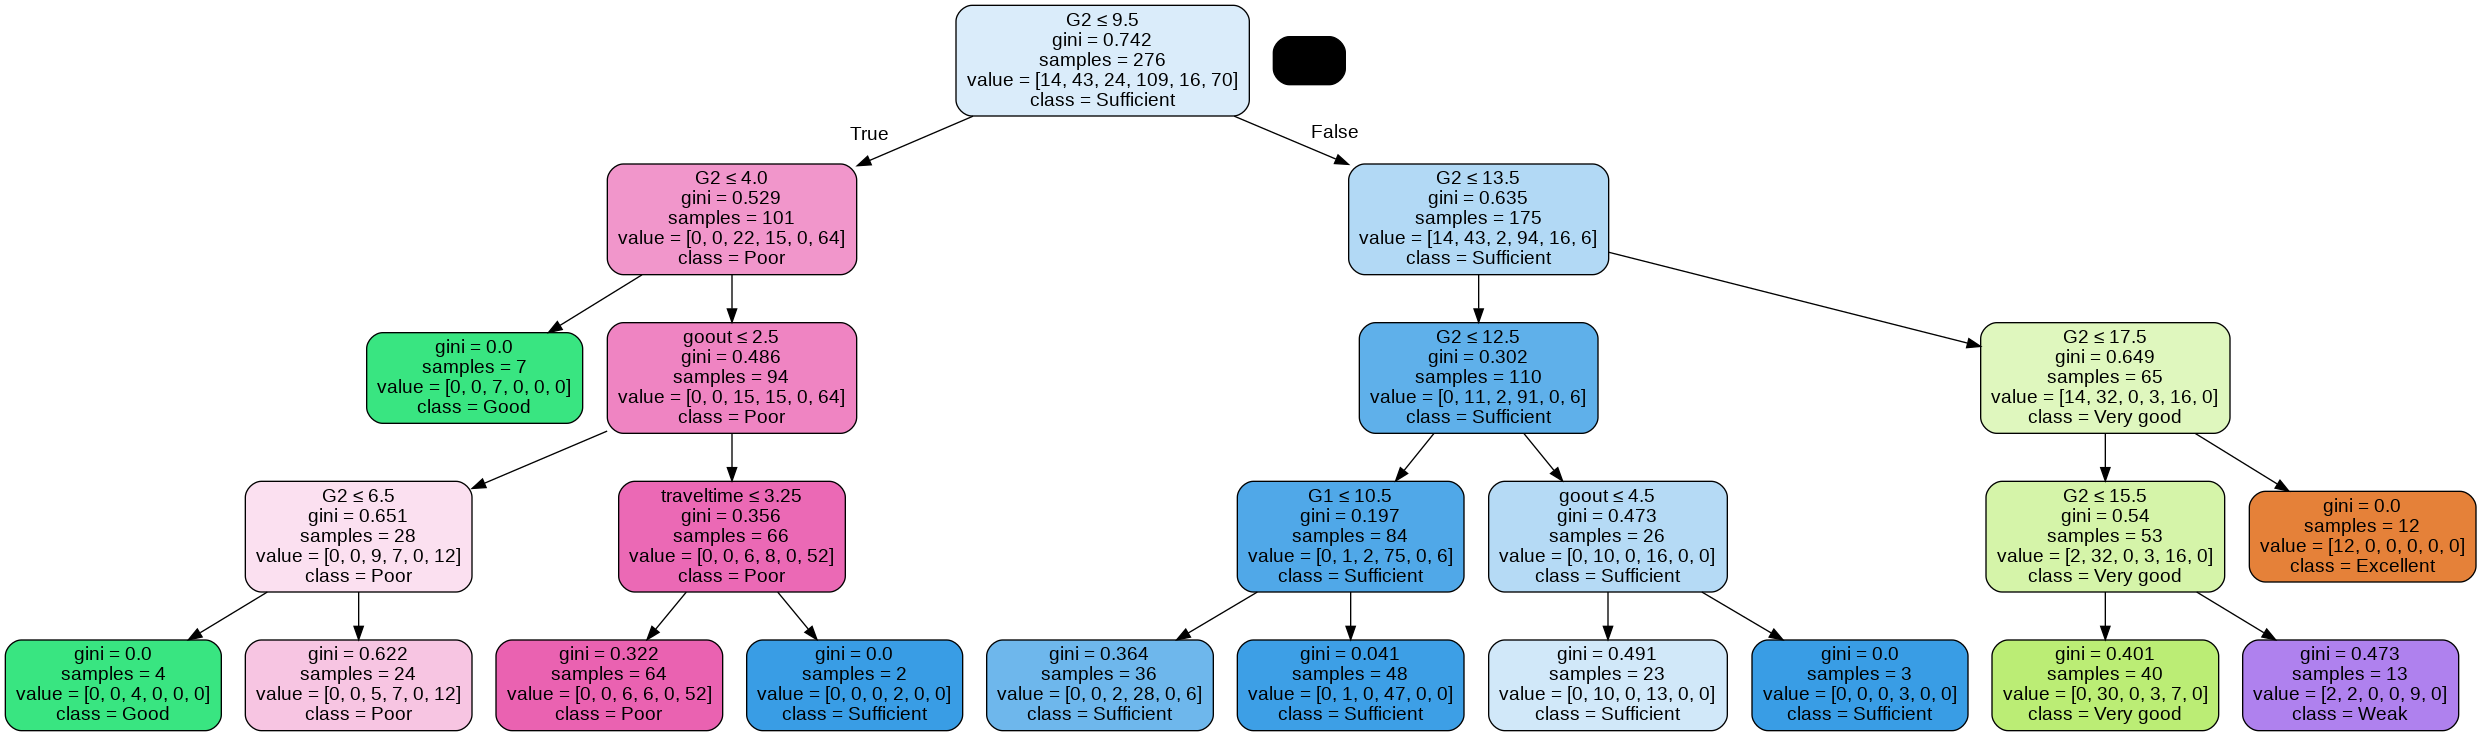

In [758]:
classes = ["Excellent", "Very good", "Good", "Sufficient", "Weak", "Poor"]
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = independent_variables,class_names=classes)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('student_grades.png')
Image(graph.create_png())

Creating a confusion matrix

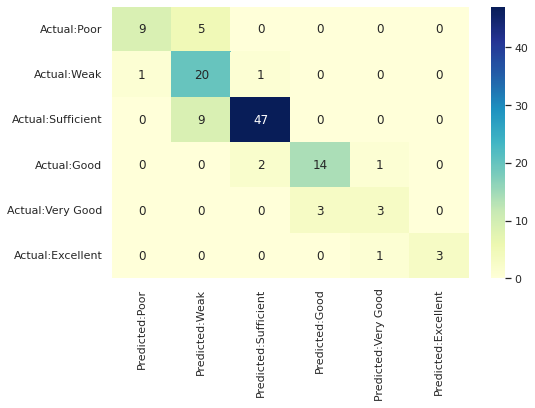

In [759]:
cm = confusion_matrix(y_test,y_pred,labels = values)
col = ['Predicted:Poor','Predicted:Weak','Predicted:Sufficient','Predicted:Good','Predicted:Very Good','Predicted:Excellent']
ind = ['Actual:Poor','Actual:Weak','Actual:Sufficient','Actual:Good','Actual:Very Good','Actual:Excellent']
conf_matrix = pd.DataFrame(data = cm, columns=col,index=ind)
plt.figure(figsize= (8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu")

A classification report of the testing data

In [760]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,labels = values))

              precision    recall  f1-score   support

        Poor       0.90      0.64      0.75        14
        Weak       0.59      0.91      0.71        22
  Sufficient       0.94      0.84      0.89        56
        Good       0.82      0.82      0.82        17
   Very good       0.60      0.50      0.55         6
   Excellent       1.00      0.75      0.86         4

    accuracy                           0.81       119
   macro avg       0.81      0.74      0.76       119
weighted avg       0.84      0.81      0.81       119

